# 1. Import and Install Dependencies

In [73]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe -U scikit-learn matplotlib

  Using cached mediapipe-0.9.2.1-cp39-cp39-win_amd64.whl (50.1 MB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached mediapipe-0.9.1.0-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.9.0.1-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.9.0-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached matplotlib-3.7.0-cp39-cp39-win_amd64.whl (7.6 MB)


In [16]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [17]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [18]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [19]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [20]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION , 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        
        print(results)
        
       #draw_landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [22]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [8]:
draw_landmarks(frame, results)

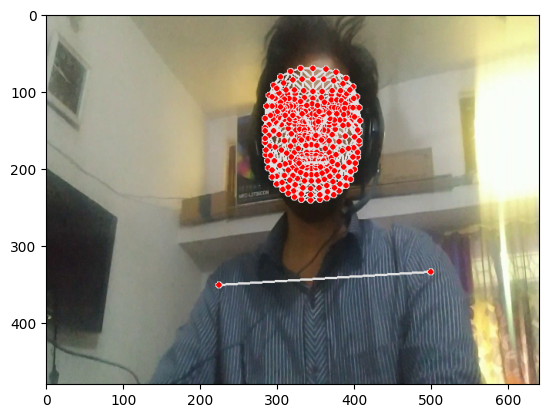

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [24]:
len(results.pose_landmarks.landmark)

33

In [25]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [26]:
pose = np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [27]:
face = np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [28]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [29]:
extract_keypoints(results).shape

(1662,)

In [30]:
result_test = extract_keypoints(results)

In [31]:
np.save('0', result_test)

In [32]:
np.load('0.npy')

array([ 0.50129116,  0.3464745 , -0.84492683, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [33]:
DATA_PATH = os.path.join('MP_DATA')

actions = np.array(['YES', 'HELLO'])
no_sequences = 30
sequence_length = 30

In [34]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
                pass

# 5. Collect Keypoint Values for Training and Testing

In [97]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [67]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [56]:
label_map = {label:num for num, label in enumerate(actions)}

In [57]:
label_map

{'YES': 0, 'HELLO': 1}

In [58]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [59]:
np.array(sequences).shape

(60, 30, 1662)

In [60]:
np.array(labels).shape

(60,)

In [61]:
X = np.array(sequences)

In [62]:
X.shape

(60, 30, 1662)

In [63]:
y = to_categorical(labels).astype(int)

In [64]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [66]:
y_test.shape

(3, 2)

# 7. Build and Train LSTM Neural Network


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [68]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [69]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [70]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [130]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 2s 437ms/step - loss: 0.7479 - categorical_accuracy: 0.4912
Epoch 2/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.5566 - categorical_accuracy: 0.3509
Epoch 3/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5288 - categorical_accuracy: 0.5263
Epoch 4/2000
2/2 [==============================] - 0s 51ms/step - loss: 1.4607 - categorical_accuracy: 0.4912
Epoch 5/2000
2/2 [==============================] - 0s 49ms/step - loss: 7.2644 - categorical_accuracy: 0.4912
Epoch 6/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.6143 - categorical_accuracy: 0.4912
Epoch 7/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.1877 - categorical_accuracy: 0.6491
Epoch 8/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.6078 - categorical_accuracy: 0.4561
Epoch 9/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.2014 - categorical_accuracy: 0.4912


2/2 [==============================] - 0s 52ms/step - loss: 0.3400 - categorical_accuracy: 0.8772
Epoch 75/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.3633 - categorical_accuracy: 0.8421
Epoch 76/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.5020 - categorical_accuracy: 0.7544
Epoch 77/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.3387 - categorical_accuracy: 0.8947
Epoch 78/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.3434 - categorical_accuracy: 0.8596
Epoch 79/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.2864 - categorical_accuracy: 0.8596
Epoch 80/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.3044 - categorical_accuracy: 0.8772
Epoch 81/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.2723 - categorical_accuracy: 0.8947
Epoch 82/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.2849 - categorical_accuracy: 0.8772
Epoch 

2/2 [==============================] - 0s 53ms/step - loss: 0.2027 - categorical_accuracy: 0.9123
Epoch 219/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2262 - categorical_accuracy: 0.8421
Epoch 220/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.1987 - categorical_accuracy: 0.8947
Epoch 221/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.2149 - categorical_accuracy: 0.8772
Epoch 222/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3577 - categorical_accuracy: 0.8772
Epoch 223/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.4150 - categorical_accuracy: 0.8421
Epoch 224/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.6362 - categorical_accuracy: 0.7544
Epoch 225/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3065 - categorical_accuracy: 0.8772
Epoch 226/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.1783 - categorical_accuracy: 0.947

2/2 [==============================] - 0s 56ms/step - loss: 0.1105 - categorical_accuracy: 0.9649
Epoch 363/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0919 - categorical_accuracy: 0.9825
Epoch 364/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0870 - categorical_accuracy: 0.9649
Epoch 365/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0965 - categorical_accuracy: 0.9649
Epoch 366/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0908 - categorical_accuracy: 0.9649
Epoch 367/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0711 - categorical_accuracy: 0.9825
Epoch 368/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.0897 - categorical_accuracy: 0.9649
Epoch 369/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0683 - categorical_accuracy: 0.9825
Epoch 370/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0684 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 47ms/step - loss: 0.0855 - categorical_accuracy: 0.9825
Epoch 507/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0681 - categorical_accuracy: 0.9825
Epoch 508/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0272 - categorical_accuracy: 1.0000
Epoch 509/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0281 - categorical_accuracy: 0.9825
Epoch 510/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.0296 - categorical_accuracy: 1.0000
Epoch 511/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0390 - categorical_accuracy: 0.9825
Epoch 512/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0220 - categorical_accuracy: 0.9825
Epoch 513/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0606 - categorical_accuracy: 0.9649
Epoch 514/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.1383 - categorical_accuracy: 0.964

2/2 [==============================] - 0s 52ms/step - loss: 0.0094 - categorical_accuracy: 1.0000
Epoch 651/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 652/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0084 - categorical_accuracy: 1.0000
Epoch 653/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 654/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 655/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0099 - categorical_accuracy: 1.0000
Epoch 656/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 657/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0150 - categorical_accuracy: 1.0000
Epoch 658/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0106 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 53ms/step - loss: 0.0084 - categorical_accuracy: 1.0000
Epoch 795/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.0117 - categorical_accuracy: 1.0000
Epoch 796/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 797/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 798/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 799/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 800/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 801/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 802/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.0061 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 50ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 939/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 940/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 941/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 942/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 943/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 944/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 945/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 946/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0016 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 51ms/step - loss: 2.5312e-04 - categorical_accuracy: 1.0000
Epoch 1078/2000
2/2 [==============================] - 0s 53ms/step - loss: 2.5219e-04 - categorical_accuracy: 1.0000
Epoch 1079/2000
2/2 [==============================] - 0s 53ms/step - loss: 2.5098e-04 - categorical_accuracy: 1.0000
Epoch 1080/2000
2/2 [==============================] - 0s 49ms/step - loss: 2.5008e-04 - categorical_accuracy: 1.0000
Epoch 1081/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.4860e-04 - categorical_accuracy: 1.0000
Epoch 1082/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.4796e-04 - categorical_accuracy: 1.0000
Epoch 1083/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.4685e-04 - categorical_accuracy: 1.0000
Epoch 1084/2000
2/2 [==============================] - 0s 49ms/step - loss: 2.4580e-04 - categorical_accuracy: 1.0000
Epoch 1085/2000
2/2 [==============================] - 0s 49ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 1.5725e-04 - categorical_accuracy: 1.0000
Epoch 1216/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5673e-04 - categorical_accuracy: 1.0000
Epoch 1217/2000
2/2 [==============================] - 0s 49ms/step - loss: 1.5648e-04 - categorical_accuracy: 1.0000
Epoch 1218/2000
2/2 [==============================] - 0s 49ms/step - loss: 1.5610e-04 - categorical_accuracy: 1.0000
Epoch 1219/2000
2/2 [==============================] - 0s 51ms/step - loss: 1.5572e-04 - categorical_accuracy: 1.0000
Epoch 1220/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.5534e-04 - categorical_accuracy: 1.0000
Epoch 1221/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.5490e-04 - categorical_accuracy: 1.0000
Epoch 1222/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.5430e-04 - categorical_accuracy: 1.0000
Epoch 1223/2000
2/2 [==============================] - 0s 53ms/step - lo

2/2 [==============================] - 0s 55ms/step - loss: 1.1250e-04 - categorical_accuracy: 1.0000
Epoch 1354/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.1228e-04 - categorical_accuracy: 1.0000
Epoch 1355/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.1202e-04 - categorical_accuracy: 1.0000
Epoch 1356/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.1181e-04 - categorical_accuracy: 1.0000
Epoch 1357/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.1153e-04 - categorical_accuracy: 1.0000
Epoch 1358/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.1136e-04 - categorical_accuracy: 1.0000
Epoch 1359/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.1115e-04 - categorical_accuracy: 1.0000
Epoch 1360/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.1074e-04 - categorical_accuracy: 1.0000
Epoch 1361/2000
2/2 [==============================] - 0s 59ms/step - lo

2/2 [==============================] - 0s 52ms/step - loss: 8.4985e-05 - categorical_accuracy: 1.0000
Epoch 1492/2000
2/2 [==============================] - 0s 53ms/step - loss: 8.4814e-05 - categorical_accuracy: 1.0000
Epoch 1493/2000
2/2 [==============================] - 0s 51ms/step - loss: 8.4634e-05 - categorical_accuracy: 1.0000
Epoch 1494/2000
2/2 [==============================] - 0s 51ms/step - loss: 8.4498e-05 - categorical_accuracy: 1.0000
Epoch 1495/2000
2/2 [==============================] - 0s 50ms/step - loss: 8.4438e-05 - categorical_accuracy: 1.0000
Epoch 1496/2000
2/2 [==============================] - 0s 52ms/step - loss: 8.4243e-05 - categorical_accuracy: 1.0000
Epoch 1497/2000
2/2 [==============================] - 0s 53ms/step - loss: 8.4026e-05 - categorical_accuracy: 1.0000
Epoch 1498/2000
2/2 [==============================] - 0s 54ms/step - loss: 8.3940e-05 - categorical_accuracy: 1.0000
Epoch 1499/2000
2/2 [==============================] - 0s 55ms/step - lo

2/2 [==============================] - 0s 56ms/step - loss: 6.5992e-05 - categorical_accuracy: 1.0000
Epoch 1630/2000
2/2 [==============================] - 0s 57ms/step - loss: 6.5933e-05 - categorical_accuracy: 1.0000
Epoch 1631/2000
2/2 [==============================] - 0s 52ms/step - loss: 6.5785e-05 - categorical_accuracy: 1.0000
Epoch 1632/2000
2/2 [==============================] - 0s 55ms/step - loss: 6.5684e-05 - categorical_accuracy: 1.0000
Epoch 1633/2000
2/2 [==============================] - 0s 59ms/step - loss: 6.5553e-05 - categorical_accuracy: 1.0000
Epoch 1634/2000
2/2 [==============================] - 0s 49ms/step - loss: 6.5398e-05 - categorical_accuracy: 1.0000
Epoch 1635/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.5329e-05 - categorical_accuracy: 1.0000
Epoch 1636/2000
2/2 [==============================] - 0s 49ms/step - loss: 6.5181e-05 - categorical_accuracy: 1.0000
Epoch 1637/2000
2/2 [==============================] - 0s 51ms/step - lo

2/2 [==============================] - 0s 51ms/step - loss: 5.2416e-05 - categorical_accuracy: 1.0000
Epoch 1768/2000
2/2 [==============================] - 0s 50ms/step - loss: 5.2320e-05 - categorical_accuracy: 1.0000
Epoch 1769/2000
2/2 [==============================] - 0s 49ms/step - loss: 5.2230e-05 - categorical_accuracy: 1.0000
Epoch 1770/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.2188e-05 - categorical_accuracy: 1.0000
Epoch 1771/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.2082e-05 - categorical_accuracy: 1.0000
Epoch 1772/2000
2/2 [==============================] - 0s 52ms/step - loss: 5.2011e-05 - categorical_accuracy: 1.0000
Epoch 1773/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.1919e-05 - categorical_accuracy: 1.0000
Epoch 1774/2000
2/2 [==============================] - 0s 53ms/step - loss: 5.1856e-05 - categorical_accuracy: 1.0000
Epoch 1775/2000
2/2 [==============================] - 0s 53ms/step - lo

2/2 [==============================] - 0s 60ms/step - loss: 4.2139e-05 - categorical_accuracy: 1.0000
Epoch 1906/2000
2/2 [==============================] - 0s 62ms/step - loss: 4.2080e-05 - categorical_accuracy: 1.0000
Epoch 1907/2000
2/2 [==============================] - 0s 55ms/step - loss: 4.2017e-05 - categorical_accuracy: 1.0000
Epoch 1908/2000
2/2 [==============================] - 0s 53ms/step - loss: 4.1953e-05 - categorical_accuracy: 1.0000
Epoch 1909/2000
2/2 [==============================] - 0s 53ms/step - loss: 4.1884e-05 - categorical_accuracy: 1.0000
Epoch 1910/2000
2/2 [==============================] - 0s 57ms/step - loss: 4.1815e-05 - categorical_accuracy: 1.0000
Epoch 1911/2000
2/2 [==============================] - 0s 64ms/step - loss: 4.1779e-05 - categorical_accuracy: 1.0000
Epoch 1912/2000
2/2 [==============================] - 0s 56ms/step - loss: 4.1704e-05 - categorical_accuracy: 1.0000
Epoch 1913/2000
2/2 [==============================] - 0s 50ms/step - lo

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

# 8. Make Predictions


In [72]:
res = model.predict(X_test)

In [73]:
actions[np.argmax(res[2])]

'YES'

In [74]:
actions[np.argmax(y_test[2])]

'HELLO'

# 9. Save Weights

In [75]:
model.save('action.h5')

In [120]:
del model

In [76]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [77]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [78]:
yhat = model.predict(X_test)

In [79]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [80]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 1],
        [0, 2]],

       [[2, 0],
        [1, 0]]], dtype=int64)

In [81]:
accuracy_score(ytrue, yhat)

0.6666666666666666

# 11. Test in Real Time


In [82]:
from scipy import stats

In [83]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        return output_frame

In [84]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [86]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.python.solution_base.SolutionOutputs'>
YES
<class 'mediapipe.py